<a href="https://colab.research.google.com/github/tyagisumalini/MLProject/blob/main/EDA_ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Spark init

!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz 
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
!pip install -q findspark
import findspark
findspark.init()

In [3]:
# Import Spark Context 
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName("First Spark App").setMaster("local")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

In [4]:
# Import pyspark session

from pyspark.sql.types import *

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [5]:
# Read the data from raw files for 2015 and 2016 
df_raw_data_2016 = spark.read.csv('/content/drive/MyDrive/data/Uber_JAN_JUNE16.csv', sep=',', header=True)
df_raw_data_2015 = spark.read.csv('/content/drive/MyDrive/data/Uber_JAN_JUNE15.csv', sep=',', header=True)

In [6]:
# Display head to check the data read into dataframes

df_raw_data_2016.head(5)

[Row(id='id0190469', vendor_id='2', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='5', pickup_longitude='-73.8095459', pickup_latitude='40.76835159', store_and_fwd_flag='N', trip_duration='849'),
 Row(id='id1665586', vendor_id='1', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='1', pickup_longitude='-73.8683956', pickup_latitude='40.7633522', store_and_fwd_flag='N', trip_duration='1294'),
 Row(id='id1210365', vendor_id='2', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='5', pickup_longitude='-73.8095459', pickup_latitude='40.76835159', store_and_fwd_flag='N', trip_duration='408'),
 Row(id='id3888279', vendor_id='1', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='1', pickup_longitude='-73.8683956', pickup_latitude='40.7633522', store_and_fwd_flag='N', trip_duration='280'),
 Row(id='id0924227', vendor_id='1', pickup_datetime='01/01/2016', dropoff_datetime='01/01/201

In [7]:
# Drop the columns that are not needed from the dataframe and store it in a new clean dataframe

cols =['id','vendor_id','dropoff_datetime','passenger_count','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration']

df_raw_data_2016_clean= df_raw_data_2016.drop(*cols)

In [8]:
# Display clean dataframe to ensure the columns are dropped

df_raw_data_2016_clean.head(5)

[Row(pickup_datetime='01/01/2016', pickup_longitude='-73.8095459', pickup_latitude='40.76835159'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.8683956', pickup_latitude='40.7633522'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.8095459', pickup_latitude='40.76835159'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.8683956', pickup_latitude='40.7633522'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.78371636', pickup_latitude='40.73489449')]

In [9]:
# Drop  columns that are not needed from the dataframe and store it in a new clean dataframe

cols =['Dispatching_base_num','Affiliated_base_num','locationID']

df_raw_data_2015_clean= df_raw_data_2015.drop(*cols)

In [10]:
# Display clean dataframe to ensure the columns are dropped

df_raw_data_2015_clean.head(5)

[Row(Pickup_date='03/22/2015', pickup_longitude='-73.96433367', pickup_latitude='40.59995429'),
 Row(Pickup_date='03/22/2015', pickup_longitude='-73.76881576', pickup_latitude='40.7338989'),
 Row(Pickup_date='03/22/2015', pickup_longitude='-73.95723115', pickup_latitude='40.76622978'),
 Row(Pickup_date='03/22/2015', pickup_longitude='-73.89935346', pickup_latitude='40.76398618'),
 Row(Pickup_date='03/22/2015', pickup_longitude='-73.996592', pickup_latitude='40.70213161')]

In [11]:
# Combine the two dataframes into one

unionDF = df_raw_data_2016_clean.union(df_raw_data_2015_clean)
unionDF.show(truncate=False)
unionDF.count()

+---------------+----------------+---------------+
|pickup_datetime|pickup_longitude|pickup_latitude|
+---------------+----------------+---------------+
|01/01/2016     |-73.8095459     |40.76835159    |
|01/01/2016     |-73.8683956     |40.7633522     |
|01/01/2016     |-73.8095459     |40.76835159    |
|01/01/2016     |-73.8683956     |40.7633522     |
|01/01/2016     |-73.78371636    |40.73489449    |
|01/01/2016     |-73.96236332    |40.68796681    |
|01/01/2016     |-73.9814305     |40.58840282    |
|01/01/2016     |-73.81945922    |40.67615527    |
|01/01/2016     |-73.8884369     |40.64679238    |
|01/01/2016     |-73.89975124    |40.63804206    |
|01/01/2016     |-73.97390784    |40.79037998    |
|01/01/2016     |-73.8630363     |40.75257951    |
|01/01/2016     |-73.7644889     |40.66218792    |
|01/01/2016     |-73.97488148    |40.69079511    |
|01/01/2016     |-73.91364751    |40.67663762    |
|01/01/2016     |-73.90591108    |40.86526568    |
|01/01/2016     |-73.91597421  

2097150

In [12]:
# Display schema

unionDF.printSchema()

root
 |-- pickup_datetime: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)



In [13]:
# Change the dataype of the latitiude column
unionDF = unionDF.withColumn("pickup_latitude", unionDF['pickup_latitude'].\
           								cast(FloatType()))

In [14]:
# Chsnge the datatype of the longitude column
unionDF = unionDF.withColumn("pickup_longitude", unionDF['pickup_longitude'].\
           								cast(FloatType()))

In [15]:
# Convert the datetime column data type to date data type

from datetime import datetime

from pyspark.sql.functions import col, udf

from pyspark.sql.types import DateType

# Setting an user define function:

# This function converts the string cell into a date:

func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())

unionDF = unionDF.withColumn('Date', func(col('pickup_datetime')))

# SHow and print the schema post conversion to ensure the changes were made
unionDF.show()

unionDF.printSchema()

+---------------+----------------+---------------+----------+
|pickup_datetime|pickup_longitude|pickup_latitude|      Date|
+---------------+----------------+---------------+----------+
|     01/01/2016|       -73.80955|      40.768353|2016-01-01|
|     01/01/2016|       -73.86839|       40.76335|2016-01-01|
|     01/01/2016|       -73.80955|      40.768353|2016-01-01|
|     01/01/2016|       -73.86839|       40.76335|2016-01-01|
|     01/01/2016|      -73.783714|      40.734894|2016-01-01|
|     01/01/2016|      -73.962364|      40.687965|2016-01-01|
|     01/01/2016|       -73.98143|        40.5884|2016-01-01|
|     01/01/2016|       -73.81946|      40.676155|2016-01-01|
|     01/01/2016|      -73.888435|      40.646793|2016-01-01|
|     01/01/2016|       -73.89975|      40.638042|2016-01-01|
|     01/01/2016|       -73.97391|       40.79038|2016-01-01|
|     01/01/2016|       -73.86304|       40.75258|2016-01-01|
|     01/01/2016|       -73.76449|       40.66219|2016-01-01|
|     01

In [16]:
# Drop the datetime column of string type 
cols =['pickup_datetime']

unionDF= unionDF.drop(*cols)

In [17]:
# Display clean dataframe

unionDF.show()

+----------------+---------------+----------+
|pickup_longitude|pickup_latitude|      Date|
+----------------+---------------+----------+
|       -73.80955|      40.768353|2016-01-01|
|       -73.86839|       40.76335|2016-01-01|
|       -73.80955|      40.768353|2016-01-01|
|       -73.86839|       40.76335|2016-01-01|
|      -73.783714|      40.734894|2016-01-01|
|      -73.962364|      40.687965|2016-01-01|
|       -73.98143|        40.5884|2016-01-01|
|       -73.81946|      40.676155|2016-01-01|
|      -73.888435|      40.646793|2016-01-01|
|       -73.89975|      40.638042|2016-01-01|
|       -73.97391|       40.79038|2016-01-01|
|       -73.86304|       40.75258|2016-01-01|
|       -73.76449|       40.66219|2016-01-01|
|      -73.974884|      40.690796|2016-01-01|
|       -73.91365|      40.676636|2016-01-01|
|      -73.905914|      40.865265|2016-01-01|
|       -73.91598|      40.852524|2016-01-01|
|       -73.79096|      40.694427|2016-01-01|
|       -73.76114|       40.71064|

Feature Engineering

In [18]:
# Import the needed functions to add features
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [19]:
# Break down the data to include day of the month

unionDF = unionDF.withColumn("day", dayofmonth("Date"))
unionDF.show(2)

+----------------+---------------+----------+---+
|pickup_longitude|pickup_latitude|      Date|day|
+----------------+---------------+----------+---+
|       -73.80955|      40.768353|2016-01-01|  1|
|       -73.86839|       40.76335|2016-01-01|  1|
+----------------+---------------+----------+---+
only showing top 2 rows



In [20]:
# Break down the data to include the month

unionDF = unionDF.withColumn("month", month("Date"))
unionDF.show(2)

+----------------+---------------+----------+---+-----+
|pickup_longitude|pickup_latitude|      Date|day|month|
+----------------+---------------+----------+---+-----+
|       -73.80955|      40.768353|2016-01-01|  1|    1|
|       -73.86839|       40.76335|2016-01-01|  1|    1|
+----------------+---------------+----------+---+-----+
only showing top 2 rows



In [21]:
# Break down the data to include the year

unionDF = unionDF.withColumn("Year", year("Date"))
unionDF.show(2)

+----------------+---------------+----------+---+-----+----+
|pickup_longitude|pickup_latitude|      Date|day|month|Year|
+----------------+---------------+----------+---+-----+----+
|       -73.80955|      40.768353|2016-01-01|  1|    1|2016|
|       -73.86839|       40.76335|2016-01-01|  1|    1|2016|
+----------------+---------------+----------+---+-----+----+
only showing top 2 rows



In [22]:
# Break down the data to include day of the week

unionDF = unionDF.withColumn("dayofweek", date_format("date", 'E'))
unionDF.show(2)

+----------------+---------------+----------+---+-----+----+---------+
|pickup_longitude|pickup_latitude|      Date|day|month|Year|dayofweek|
+----------------+---------------+----------+---+-----+----+---------+
|       -73.80955|      40.768353|2016-01-01|  1|    1|2016|      Fri|
|       -73.86839|       40.76335|2016-01-01|  1|    1|2016|      Fri|
+----------------+---------------+----------+---+-----+----+---------+
only showing top 2 rows



Data Exploration

Number of Trips in months

In [23]:
n_trips_month = unionDF.groupby(unionDF["month"]).count()
n_trips_month.show(2)

+-----+------+
|month| count|
+-----+------+
|    1|363483|
|    6|361203|
+-----+------+
only showing top 2 rows



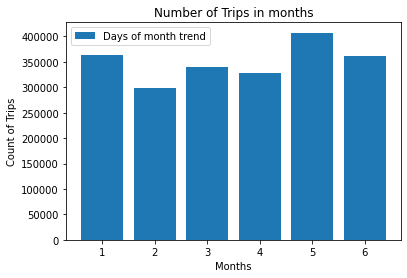

In [24]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_month.toPandas()['month'].values.tolist()

y= n_trips_month.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of month trend")
plt.plot()

plt.xlabel("Months")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in months")
plt.legend()
plt.show()

Number of Trips in days of months

In [25]:
n_trips_of_day = unionDF.groupby('day').count()
n_trips_of_day.show(2)

+---+-----+
|day|count|
+---+-----+
| 31|52778|
| 28|80293|
+---+-----+
only showing top 2 rows



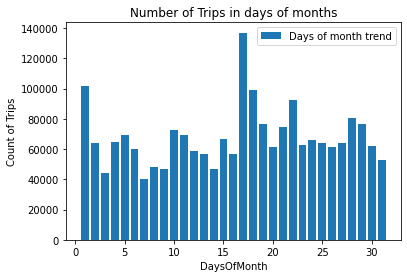

In [26]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_of_day.toPandas()['day'].values.tolist()

y= n_trips_of_day.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of month trend")
plt.plot()

plt.xlabel("DaysOfMonth")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in days of months")
plt.legend()
plt.show()

Number of Trips in days of week

In [27]:
n_trips_dayofweek = unionDF.groupby(unionDF["dayofweek"]).count()
n_trips_dayofweek.show(2)

+---------+------+
|dayofweek| count|
+---------+------+
|      Sun|305080|
|      Mon|288227|
+---------+------+
only showing top 2 rows



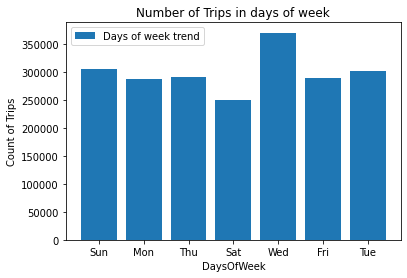

In [28]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_dayofweek.toPandas()['dayofweek'].values.tolist()

y= n_trips_dayofweek.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of week trend")
plt.plot()

plt.xlabel("DaysOfWeek")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in days of week")
plt.legend()
plt.show()

Geographical Data

In [29]:
spark.read.option("multiline","true").json
% pip install geopandas
import geopandas as gpd
% pip install geopandas
import os.path, json, io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 20)
! pip install retrying
from retrying import retry # for exponential back down when calling TurboOverdrive API

import pyspark.sql.functions as func # resuse as func.coalace for example
from pyspark.sql.types import StringType, IntegerType, FloatType, DoubleType,DecimalType
from pyspark.sql import SparkSession

import pandas as pd
from geopandas import GeoDataFrame # Loading boundaries Data
from shapely.geometry import shapely,Point, Polygon, shape # creating geospatial data
from shapely import wkb, wkt # creating and parsing geospatial data
from ast import literal_eval as make_tuple # used to decode data from java

In [30]:
# Read the geojson file

df_poly = gpd.read_file('/content/drive/MyDrive/data/2010NeighborhoodTabulationAreas.geojson')

ntacode        195
shape_area     195
county_fips    195
ntaname        195
shape_leng     195
boro_name      195
boro_code      195
geometry       195
dtype: int64

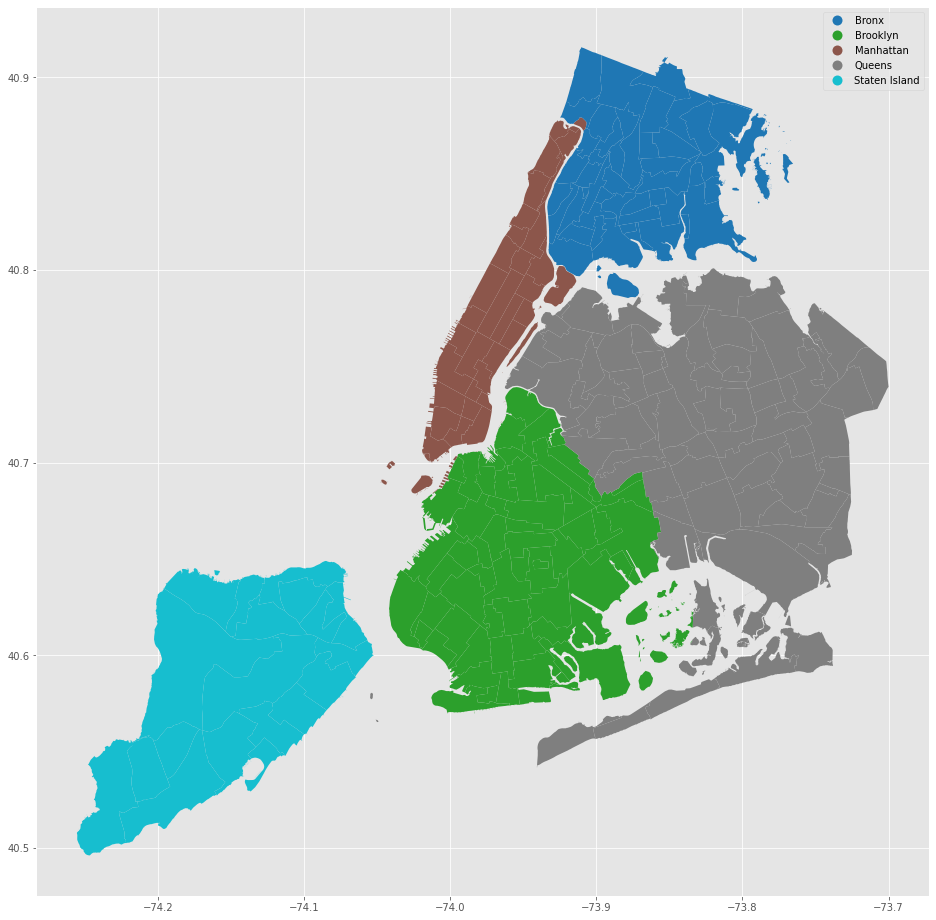

In [31]:
# Plot the multipolygon dataframe to check the areas available

df_poly.plot(column='boro_name', categorical=True, legend=True)
df_poly.count()

In [32]:
# This step was done to convert the multipolygon field into polygon
exploded = df_poly.explode(index_parts=True)
exploded

ntacode     shape_area county_fips                           ntaname  \
0   0    QN51  52488277.4492         081                       Murray Hill   
1   0    QN27   19726845.734         081                     East Elmhurst   
2   0    QN41  27774853.5522         081              Fresh Meadows-Utopia   
3   0    QN08  77412747.8943         081                        St. Albans   
4   0    BK69  20528197.0269         047                      Clinton Hill   
...       ...            ...         ...                               ...   
192 2    MN34  24494900.5685         061                 East Harlem North   
    3    MN34  24494900.5685         061                 East Harlem North   
    4    MN34  24494900.5685         061                 East Harlem North   
193 0    BX14  18221640.2327         005  East Concourse-Concourse Village   
194 0    BX34  17271763.8139         005    Melrose South-Mott Haven North   

          shape_leng  boro_name boro_code  \
0   0  33266.9048559     Queens         4   
1   0  19816.7117581     Queens         4   
2   0  22106.4312724     Queens         4   
3   0  45401.3167856     Queens         4   
4   0  23971.4662361   Brooklyn         3   
...              ...        ...       ...   
192 2  30603.7155941  Manhattan         1   
    3  30603.7155941  Manhattan         1   
    4  30603.7155941  Manhattan         1   
193 0  27199.9115779      Bronx         2   
194 0  19589.1955773      Bronx         2   

                                                geometry  
0   0  POLYGON ((-73.80379 40.77561, -73.80099 40.775...  
1   0  POLYGON ((-73.86110 40.76366, -73.85993 40.762...  
2   0  POLYGON ((-73.77758 40.73019, -73.77849 40.729...  
3   0  POLYGON ((-73.75205 40.70523, -73.75174 40.704...  
4   0  POLYGON ((-73.95337 40.68064, -73.95328 40.680...  
...                                                  ...  
192 2  POLYGON ((-73.92667 40.80018, -73.92670 40.800...  
    3  POLYGON ((-73.92689 40.80084, -73.92651 40.800...  
    4  POLYGON ((-73.93381 40.81651, -73.93383 40.815...  
193 0  POLYGON ((-73.90959 40.84276, -73.90962 40.842...  
194 0  POLYGON ((-73.90129 40.82048, -73.90160 40.819...  

[368 rows x 8 columns]

In [33]:
# This step was dont to convert a Polygon field to a point field

points = exploded.copy()
# change geometry 
points['geometry'] = points['geometry'].centroid
points.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


,,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,0,QN51,52488277.4492,081,Murray Hill,33266.9048559,Queens,4,POINT (-73.80955 40.76835)
1,0,QN27,19726845.734,081,East Elmhurst,19816.7117581,Queens,4,POINT (-73.86840 40.76335)
2,0,QN41,27774853.5522,081,Fresh Meadows-Utopia,22106.4312724,Queens,4,POINT (-73.78372 40.73489)
3,0,QN08,77412747.8943,081,St. Albans,45401.3167856,Queens,4,POINT (-73.76315 40.69120)
4,0,BK69,20528197.0269,047,Clinton Hill,23971.4662361,Brooklyn,3,POINT (-73.96236 40.68797)


In [34]:
#This stored proc was created to convert the Points 
def geopandas_df_to_spark_df_for_points(gdf):
  gdf['lon'] = gdf['geometry'].x
  gdf['lat'] = gdf['geometry'].y
  sdf = spark.createDataFrame(pd.DataFrame(gdf).drop(['geometry'],axis = 1))
  return sdf

In [35]:
#This is the geopandas data into a spark dataframe, with points

spark_geo_df = geopandas_df_to_spark_df_for_points(points)
spark_geo_df.show()
spark_geo_df.count()

+-------+-------------+-----------+--------------------+-------------+-------------+---------+------------------+------------------+
|ntacode|   shape_area|county_fips|             ntaname|   shape_leng|    boro_name|boro_code|               lon|               lat|
+-------+-------------+-----------+--------------------+-------------+-------------+---------+------------------+------------------+
|   QN51|52488277.4492|        081|         Murray Hill|33266.9048559|       Queens|        4|-73.80954590112775| 40.76835158791797|
|   QN27| 19726845.734|        081|       East Elmhurst|19816.7117581|       Queens|        4| -73.8683955982344|40.763352201165496|
|   QN41|27774853.5522|        081|Fresh Meadows-Utopia|22106.4312724|       Queens|        4|-73.78371636114146| 40.73489448639481|
|   QN08|77412747.8943|        081|          St. Albans|45401.3167856|       Queens|        4| -73.7631460750064| 40.69120183506941|
|   BK69|20528197.0269|        047|        Clinton Hill|23971.4662361

368

ntacode        368
shape_area     368
county_fips    368
ntaname        368
shape_leng     368
boro_name      368
boro_code      368
geometry       368
lon            368
lat            368
dtype: int64

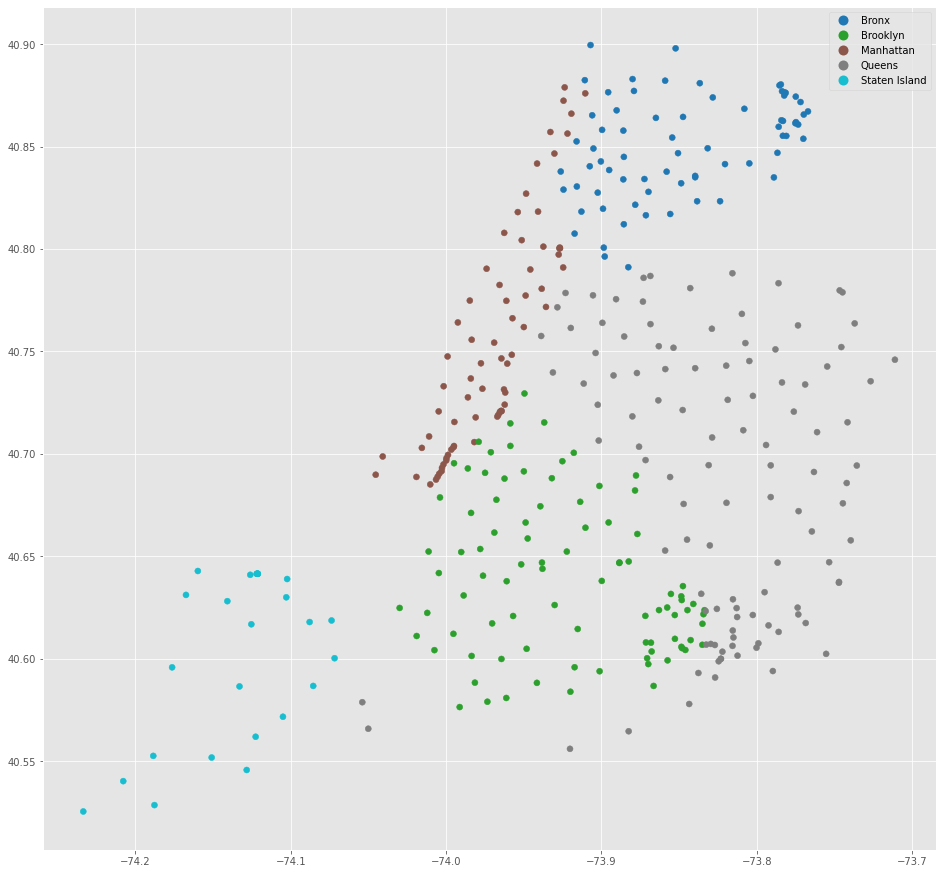

In [36]:
# Plotting the points post conversion to be able to visualize the data

points.plot(column='boro_name', categorical=True, legend=True)
points.count()

In [37]:
# Display the schema to ensure the data types are correct
spark_geo_df.printSchema()

root
 |-- ntacode: string (nullable = true)
 |-- shape_area: string (nullable = true)
 |-- county_fips: string (nullable = true)
 |-- ntaname: string (nullable = true)
 |-- shape_leng: string (nullable = true)
 |-- boro_name: string (nullable = true)
 |-- boro_code: string (nullable = true)
 |-- lon: double (nullable = true)
 |-- lat: double (nullable = true)



In [38]:
spark_geo_df = spark_geo_df.withColumn("lat", spark_geo_df['lat'].\
           								cast(FloatType()))

In [39]:
spark_geo_df = spark_geo_df.withColumn("lon", spark_geo_df['lon'].\
           								cast(FloatType()))

In [40]:
# Join the two dataframes containing Uber and Neighborhood information

# For Clustering
joined_df1 = spark_geo_df.join(unionDF, (spark_geo_df.lat ==  unionDF.pickup_latitude )& (spark_geo_df.lon ==  unionDF.pickup_longitude), how = "right")

# For Modelling
joined_df2 = spark_geo_df.join(df_raw_data_2016_clean, (spark_geo_df.lat ==  df_raw_data_2016_clean.pickup_latitude )& (spark_geo_df.lon ==  df_raw_data_2016_clean.pickup_longitude), how = "right")

In [41]:
joined_df1.show(2)

+-------+-------------+-----------+--------------------+-------------+---------+---------+---------+---------+----------------+---------------+----------+---+-----+----+---------+
|ntacode|   shape_area|county_fips|             ntaname|   shape_leng|boro_name|boro_code|      lon|      lat|pickup_longitude|pickup_latitude|      Date|day|month|Year|dayofweek|
+-------+-------------+-----------+--------------------+-------------+---------+---------+---------+---------+----------------+---------------+----------+---+-----+----+---------+
|   QN99|307092846.738|        081|park-cemetery-etc...|485958.711817|   Queens|        4|-73.77366|40.625015|       -73.77366|      40.625015|2015-05-17| 17|    5|2015|      Sun|
|   QN99|307092846.738|        081|park-cemetery-etc...|485958.711817|   Queens|        4|-73.77366|40.625015|       -73.77366|      40.625015|2015-05-17| 17|    5|2015|      Sun|
+-------+-------------+-----------+--------------------+-------------+---------+---------+---------+

In [42]:
# Convert the data type of boro_code from string to Integer 

joined_df1 = joined_df1.withColumn("boro_code", spark_geo_df['boro_code'].\
           								cast(IntegerType()))

joined_df2 = joined_df2.withColumn("boro_code", spark_geo_df['boro_code'].\
           								cast(IntegerType()))

CLUSTERING

In [162]:
# Vector Assembler

from pyspark.ml.feature import VectorAssembler

#from pyspark.ml.clustering import KMeans 
inputFeatures = ['lat', 'lon','boro_code']
assembler = VectorAssembler(inputCols=inputFeatures, outputCol="features")

In [163]:
# Transform the assembler values

output = assembler.setHandleInvalid("skip").transform(joined_df1)

In [164]:
output.printSchema()

root
 |-- ntacode: string (nullable = true)
 |-- shape_area: string (nullable = true)
 |-- county_fips: string (nullable = true)
 |-- ntaname: string (nullable = true)
 |-- shape_leng: string (nullable = true)
 |-- boro_name: string (nullable = true)
 |-- boro_code: integer (nullable = true)
 |-- lon: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- pickup_longitude: float (nullable = true)
 |-- pickup_latitude: float (nullable = true)
 |-- Date: date (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- dayofweek: string (nullable = true)
 |-- features: vector (nullable = true)



In [165]:
# Select distinct values for boro_name to display the available locations 
df_boro_name = joined_df1.select("boro_name").distinct()
df_boro_name.show(truncate=False)

+-------------+
|boro_name    |
+-------------+
|Queens       |
|Brooklyn     |
|Staten Island|
|Manhattan    |
|Bronx        |
+-------------+



In [166]:
# Split the model into train and test 

(training,test) = output.randomSplit([0.8,0.2], seed = 100)

In [167]:
training.count()

1677438

In [168]:
# Cache training dataset

training.cache()

DataFrame[ntacode: string, shape_area: string, county_fips: string, ntaname: string, shape_leng: string, boro_name: string, boro_code: int, lon: float, lat: float, pickup_longitude: float, pickup_latitude: float, Date: date, day: int, month: int, Year: int, dayofweek: string, features: vector]

In [169]:
# K Means clustering
from pyspark.ml.clustering import KMeans 

kmeans = KMeans(k=5, initMode='k-means||', featuresCol='features', predictionCol='prediction', maxIter=10)

In [171]:
# Fit the K Means clustering model using training dataset based on the features selected 

kmModel = kmeans.fit(training.select('features'))

In [172]:
# Transform the fitted model and display to verify the data available

uber_trained_data = kmModel.transform(output)
uber_trained_data.show(truncate = False)

+-------+-------------+-----------+------------------------+-------------+---------+---------+---------+---------+----------------+---------------+----------+---+-----+----+---------+-----------------------------------------+----------+
|ntacode|shape_area   |county_fips|ntaname                 |shape_leng   |boro_name|boro_code|lon      |lat      |pickup_longitude|pickup_latitude|Date      |day|month|Year|dayofweek|features                                 |prediction|
+-------+-------------+-----------+------------------------+-------------+---------+---------+---------+---------+----------------+---------------+----------+---+-----+----+---------+-----------------------------------------+----------+
|QN99   |307092846.738|081        |park-cemetery-etc-Queens|485958.711817|Queens   |4        |-73.77366|40.625015|-73.77366       |40.625015      |2015-05-17|17 |5    |2015|Sun      |[40.62501525878906,-73.7736587524414,4.0]|1         |
|QN99   |307092846.738|081        |park-cemetery-etc

In [173]:
# Group data based on boro_name and code which contain neighborhood information and predictions from the model and display the count

uber_trained_data.groupby('boro_name','boro_code','prediction').count().show()

+-------------+---------+----------+------+
|    boro_name|boro_code|prediction| count|
+-------------+---------+----------+------+
|     Brooklyn|        3|         3|405237|
|        Bronx|        2|         0|369847|
|    Manhattan|        1|         2|528866|
|Staten Island|        5|         4| 59336|
|       Queens|        4|         1|733864|
+-------------+---------+----------+------+



In [174]:
# Display the count of the predictions/clusters created

groupedByRegion = uber_trained_data.groupby(uber_trained_data['prediction']).count()
groupedByRegion.show()

+----------+------+
|prediction| count|
+----------+------+
|         1|733864|
|         3|405237|
|         4| 59336|
|         2|528866|
|         0|369847|
+----------+------+



In [178]:
# Predictions for date 

from pyspark.sql.functions import *
from datetime import datetime
from pyspark.sql.functions import to_date, to_timestamp

uber_trained_data_prediction = uber_trained_data.groupby(uber_trained_data["boro_name"]).agg(count('prediction'))

uber_trained_data_prediction.show(5)

+-------------+-----------------+
|    boro_name|count(prediction)|
+-------------+-----------------+
|       Queens|           733864|
|     Brooklyn|           405237|
|Staten Island|            59336|
|    Manhattan|           528866|
|        Bronx|           369847|
+-------------+-----------------+



In [179]:
# Converting predictions dataframe to pandas 
uber_trained_data_prediction_pandas = uber_trained_data_prediction.toPandas()

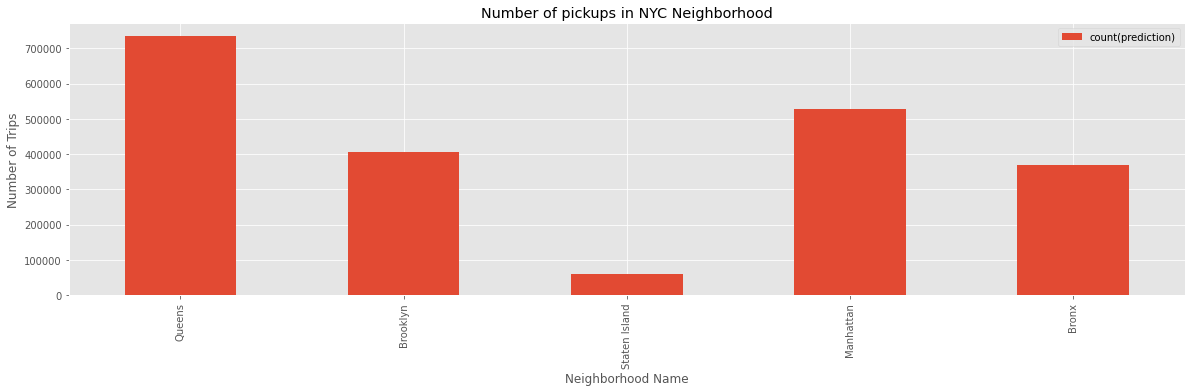

In [192]:
# Plot the count of predictions for the date range 

import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig=uber_trained_data_prediction_pandas.plot(kind = 'bar', x="boro_name", y="count(prediction)", figsize=(20,5)) 
plt.xlabel("Neighborhood Name")
plt.ylabel("Number of Trips")
plt.title("Number of pickups in NYC Neighborhood")
plt.show()

MODELLING


In [43]:
# Convert the datetime column data type to date data type for joined df2 being used for Modelling

from datetime import datetime

from pyspark.sql.functions import col, udf

from pyspark.sql.types import DateType

# Setting an user define function:

# This function converts the string cell into a date:

func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())

joined_df2 = joined_df2.withColumn('Date', func(col('pickup_datetime')))

# SHow and print the schema post conversion to ensure the changes were made
joined_df2.show()

joined_df2.printSchema()

+-------+-------------+-----------+-------------+-------------+---------+---------+--------+--------+---------------+----------------+---------------+----------+
|ntacode|   shape_area|county_fips|      ntaname|   shape_leng|boro_name|boro_code|     lon|     lat|pickup_datetime|pickup_longitude|pickup_latitude|      Date|
+-------+-------------+-----------+-------------+-------------+---------+---------+--------+--------+---------------+----------------+---------------+----------+
|   QN52|29453683.5788|        081|East Flushing|25848.5453812|   Queens|        4|-73.8073|40.75411|     01/01/2016|    -73.80729444|    40.75410897|2016-01-01|
|   QN52|29453683.5788|        081|East Flushing|25848.5453812|   Queens|        4|-73.8073|40.75411|     01/01/2016|    -73.80729444|    40.75410897|2016-01-01|
|   QN52|29453683.5788|        081|East Flushing|25848.5453812|   Queens|        4|-73.8073|40.75411|     01/01/2016|    -73.80729444|    40.75410897|2016-01-01|
|   QN52|29453683.5788|     

In [44]:
# Break down the data to include day of the month

joined_df2 = joined_df2.withColumn("day", dayofmonth("Date"))
joined_df2.show(2)

+-------+-------------+-----------+-------------+-------------+---------+---------+--------+--------+---------------+----------------+---------------+----------+---+
|ntacode|   shape_area|county_fips|      ntaname|   shape_leng|boro_name|boro_code|     lon|     lat|pickup_datetime|pickup_longitude|pickup_latitude|      Date|day|
+-------+-------------+-----------+-------------+-------------+---------+---------+--------+--------+---------------+----------------+---------------+----------+---+
|   QN52|29453683.5788|        081|East Flushing|25848.5453812|   Queens|        4|-73.8073|40.75411|     01/01/2016|    -73.80729444|    40.75410897|2016-01-01|  1|
|   QN52|29453683.5788|        081|East Flushing|25848.5453812|   Queens|        4|-73.8073|40.75411|     01/01/2016|    -73.80729444|    40.75410897|2016-01-01|  1|
+-------+-------------+-----------+-------------+-------------+---------+---------+--------+--------+---------------+----------------+---------------+----------+---+
only

In [55]:
# Convert dataframe created for modelling to pandas 

df2_conv_pd = joined_df2.toPandas()

In [254]:
df2_conv_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ntacode           1048575 non-null  object 
 1   shape_area        1048575 non-null  object 
 2   county_fips       1048575 non-null  object 
 3   ntaname           1048575 non-null  object 
 4   shape_leng        1048575 non-null  object 
 5   boro_name         1048575 non-null  object 
 6   boro_code         1048575 non-null  int32  
 7   lon               1048575 non-null  float32
 8   lat               1048575 non-null  float32
 9   pickup_datetime   1048575 non-null  object 
 10  pickup_longitude  1048575 non-null  object 
 11  pickup_latitude   1048575 non-null  object 
 12  Date              1048575 non-null  object 
dtypes: float32(2), int32(1), object(10)
memory usage: 92.0+ MB


In [56]:
# Group the pandas dataframe based on Date and display count 

df2_date_count = df2_conv_pd.groupby('Date').count()
df2_date_count

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,lon,lat,pickup_datetime,pickup_longitude,pickup_latitude,day
Date,,,,,,,,,,,,,
2016-01-01,5172,5172,5172,5172,5172,5172,5172,5172,5172,5172,5172,5172,5172
2016-01-02,4710,4710,4710,4710,4710,4710,4710,4710,4710,4710,4710,4710,4710
2016-01-03,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584
2016-01-04,4783,4783,4783,4783,4783,4783,4783,4783,4783,4783,4783,4783,4783
2016-01-05,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-26,5108,5108,5108,5108,5108,5108,5108,5108,5108,5108,5108,5108,5108
2016-06-27,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243
2016-06-28,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203,5203


In [57]:
# Drop additional columns not needed for modelling 

df2_date_count.drop(['ntacode','shape_area','county_fips','ntaname','shape_leng','boro_name','boro_code','lon','lat','pickup_datetime','pickup_longitude','pickup_latitude'],axis=1,inplace=True)

In [58]:
df2_date_count

,day
Date,
2016-01-01,5172
2016-01-02,4710
2016-01-03,4584
2016-01-04,4783
2016-01-05,5084
...,...
2016-06-26,5108
2016-06-27,5243
2016-06-28,5203


In [60]:
# Split the data into train and test calculated based on 80 percent of count of index values 

train_ts = df2_date_count[:][:146]                 
test_ts = df2_date_count[:][147:]

In [260]:
test_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   boro_code  0 non-null      int64
dtypes: int64(1)
memory usage: 0.0+ bytes


Exponential Smoothening 

In [61]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np


from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

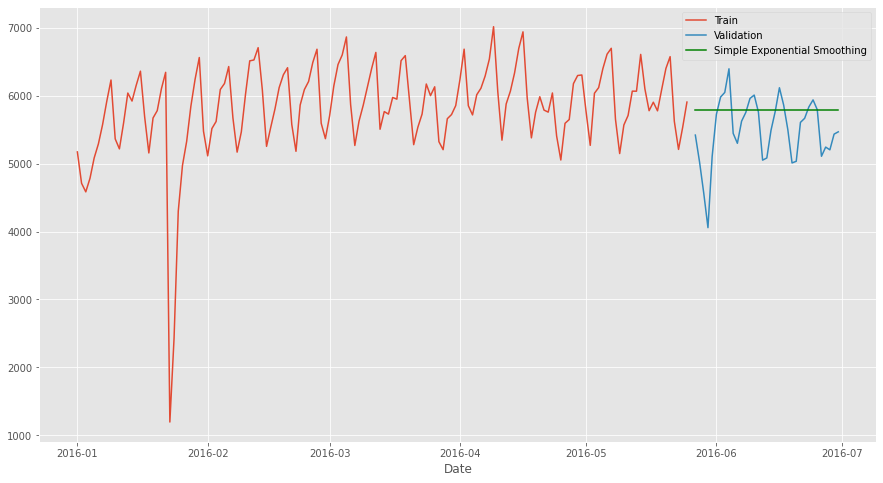

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Fit the model

hat_avg = test_ts.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_ts['day'])).fit(smoothing_level = 0.7,optimized = False)

# Forecast and plot the model

hat_avg['SES'] = fit2.forecast(len(test_ts))
plt.figure(figsize =(15,8))
train_ts['day'].plot(kind='line',figsize=(15,8), label = 'Train')
test_ts['day'].plot(kind='line', label = 'Validation')
plt.plot(hat_avg['SES'], label = 'Simple Exponential Smoothing',color='green')
plt.legend(loc = 'best')


In [68]:
# Calculating RMSE for Exponential smoothing method

hat=hat_avg['SES'].values.tolist()
rmse = np.sqrt(mean_squared_error(test_ts['day'],hat))
rmse

546.3691878211845

Holt's Winter Seasonal Method

In [76]:
# Fit the model 

hat_avg = test_ts.copy()
fit1 = ExponentialSmoothing(np.asarray(train_ts['day']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
hat_avg['Holt_Winter'] = fit1.forecast(len(test_ts))

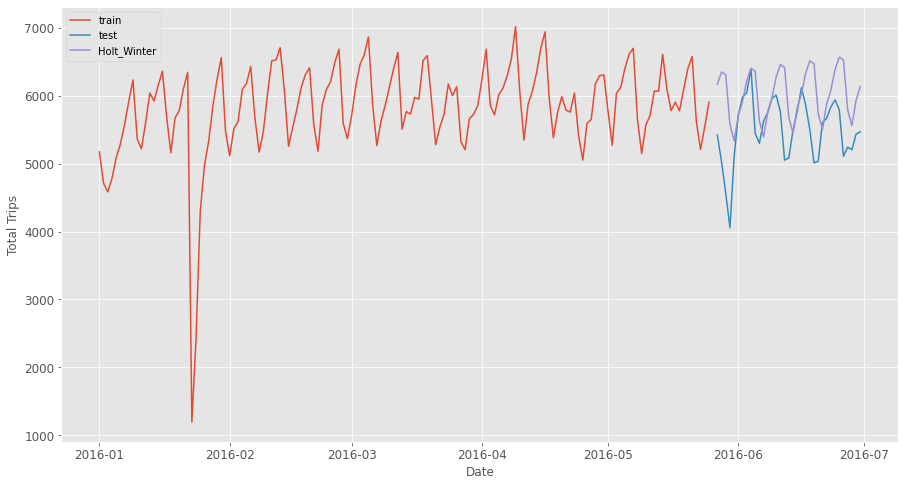

In [77]:
# Plotting the fitted model 

plt.figure(figsize=(15,5))
train_ts['day'].plot(kind='line', figsize=(15,8),fontsize=12,label='train')
test_ts['day'].plot(kind='line', figsize=(15,8),fontsize=12,label='test')
plt.plot(hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.ylabel('Total Trips')
plt.xlabel('Date')
plt.show()

In [72]:
# Calculating RMSE of the Holt_winter model 

hat=hat_avg['Holt_Winter'].values.tolist()
rmse = np.sqrt(mean_squared_error(test_ts['day'],hat))
rmse

745.6216474933117

Moving Average for 10 Observations

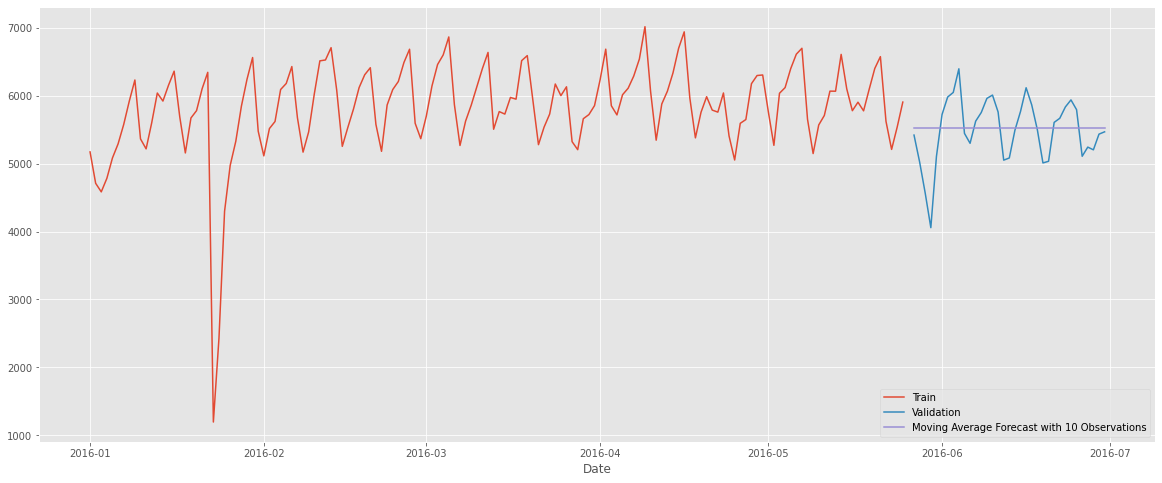

In [73]:
# Finding the rolling average and using it to plot for 10 observations 

hat_avg = test_ts.copy()
hat_avg['moving_average_forecast'] = test_ts['day'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (20,15))
train_ts['day'].plot(kind='line',figsize=(20,8), label = 'Train')
test_ts['day'].plot(kind='line', label = 'Validation')

plt.plot(hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()

In [74]:
# Calculate RMSE for the Moving Average method 

rmse = np.sqrt(mean_squared_error(test_ts['day'], hat_avg['moving_average_forecast']))
rmse

465.65011389607605

Artificial Neural Network 

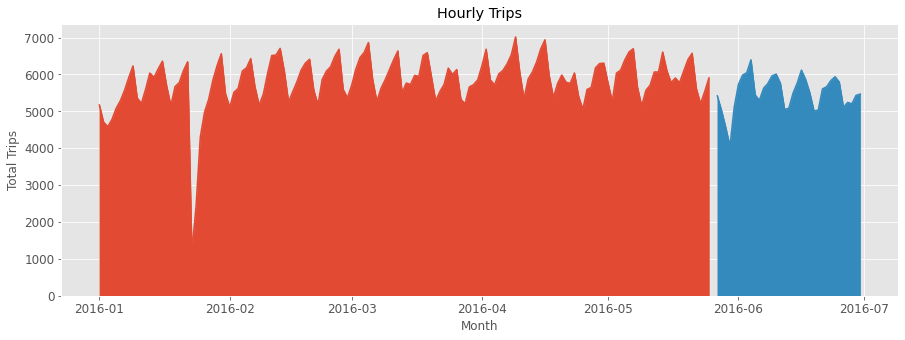

In [75]:

train_ts['day'].plot(kind='area',figsize=(15,8), title= 'Hourly Trips', fontsize=14)
test_ts['day'].plot(kind='area', figsize=(15,5), title= 'Hourly Trips', fontsize=12)
plt.ylabel('Total Trips')
plt.xlabel('Month')
plt.show()

In [78]:
def test_stationary(timeseries):
    
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    
    #Plot rolling Statistics
    act = plt.plot(timeseries, color = "blue", label = "Actual")
    mean = plt.plot(rolmean, color = "brown", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)

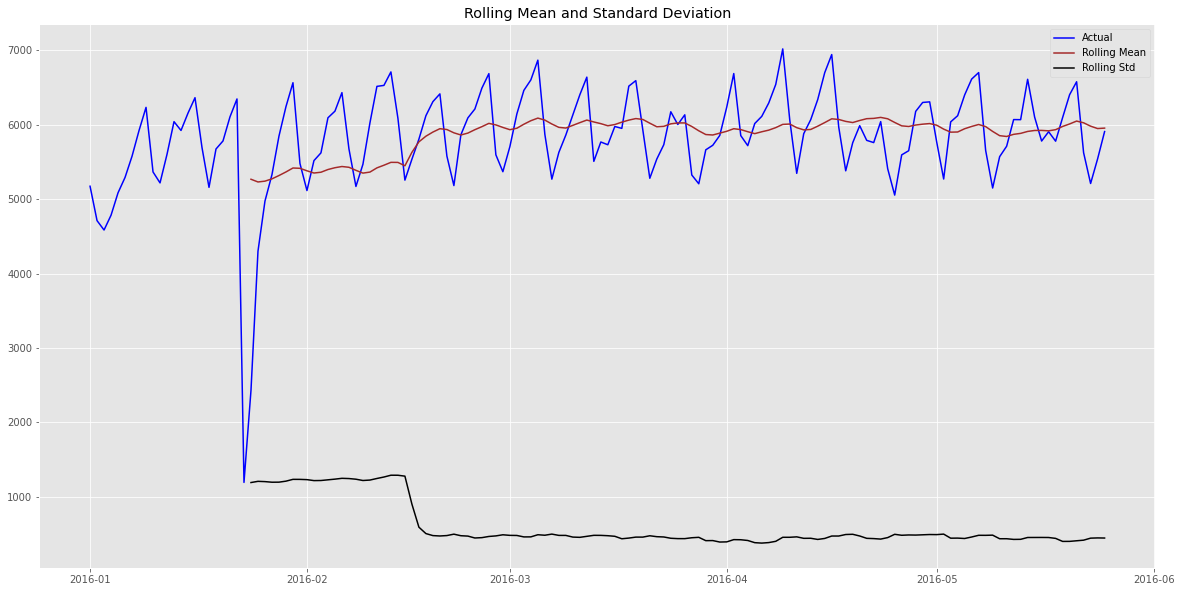

In [79]:
rcParams['figure.figsize']=(20,10)
test_stationary(train_ts['day'])

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train_sc = sc.fit_transform(train_ts)
test_sc = sc.transform(test_ts)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [81]:
K.clear_session()

In [82]:
model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/20
145/145 [==============================] - 2s 6ms/step - loss: 0.2739
Epoch 2/20
145/145 [==============================] - 1s 5ms/step - loss: 0.0171
Epoch 3/20
145/145 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 4/20
145/145 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 5/20
145/145 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 6/20
145/145 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 7/20
145/145 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 8/20
145/145 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 8: early stopping


In [83]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred_ann))
print("Train : {:0.3f}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test,y_pred_test_ann))
print("Test : {:0.3f}".format(rmse))

Train : 0.098
Test : 0.076


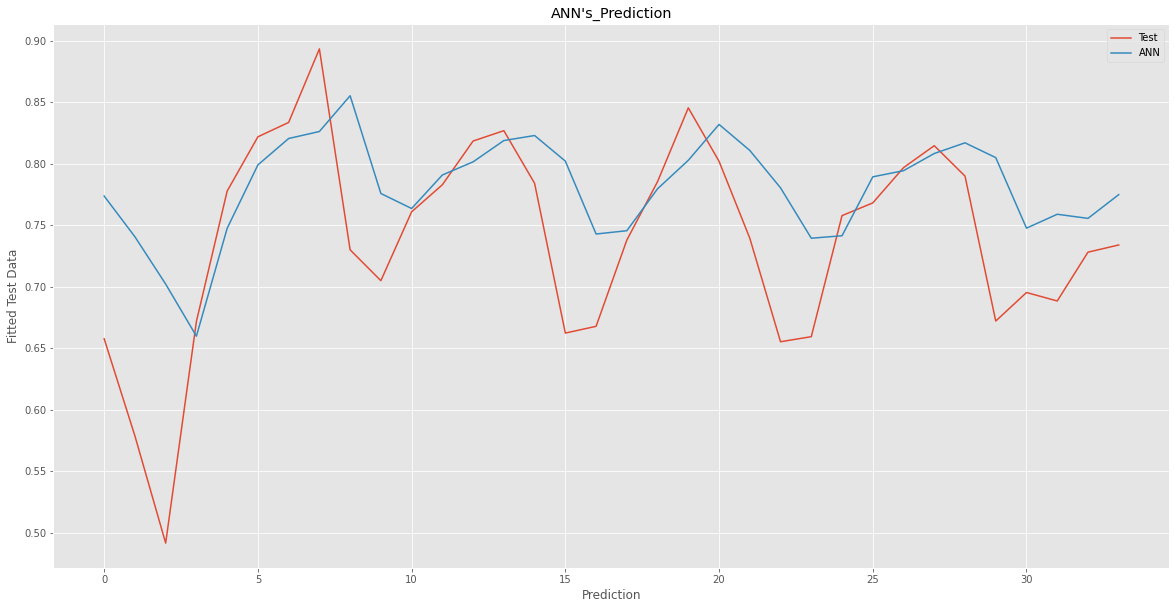

In [88]:
y_pred_test_ANN = model.predict(X_test)
plt.plot(y_test, label='Test')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Prediction')
plt.ylabel('Fitted Test Data')
plt.legend()
plt.show()

In [86]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_pred_test_ann)
print("Accuracy Score of Model: ",(acc),'%')

Accuracy Score of Model:  0.11337643232225936 %


In [87]:
score_ann= model.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)

34/34 [==============================] - 0s 2ms/step - loss: 0.0058
ANN: 0.005807
